## Working with MNIST dataset

In [1]:
import matplotlib.pyplot as plt

from dataset import load_dataset, visualize_dataset

### Loading MNIST dataset form binary data file

In [ ]:
dataset_size_in_per = 100

train_x_orig, train_y_orig, test_x_orig, test_y_orig = load_dataset(dataset = "mnist", size_in_per = dataset_size_in_per)

print("Sample Size : %d%%\n"%(dataset_size_in_per))
print("Data\t\t\t","Datatype\t\t","Dataset Size")
print("=================================================================")
print("Training Set Images:\t" + str(type(train_x_orig))+"\t",str(train_x_orig.shape))
print("Training Set Labels:\t" + str(type(train_y_orig))+"\t",str(train_y_orig.shape))
print("Test Set Images:\t" + str(type(test_x_orig))+"\t",str(test_x_orig.shape))
print("Test Set Labels:\t" + str(type(test_y_orig))+"\t",str(test_y_orig.shape))
print("=================================================================")



In [ ]:
visualize_dataset(train_x_orig, train_y_orig, dataset = "mnist", dataset_type = "training")

## Working with custom data images

In [4]:
import os.path
from PIL import Image
import numpy as np
from scipy import ndimage

from dataset import get_files

### Loading Custom images from local directory

In [5]:

def load_images_from_file(path):
    #checking for the validity of the path
    if not os.path.exists(path):
            raise ValueError("Given folder doesnot exist")

    image_names = sorted(get_files(image_path))
    images = []
    lbls = []
    for image_name in image_names:
        fname = image_path + image_name
        image_data = np.asarray(Image.open(fname).resize((28,28)).convert('L')).reshape(28,28)
        images.append(image_data.tolist())
        lbls.append(image_name[0])

    real_images = np.asarray(images)
    labels = np.asarray(lbls)
    
    return real_images, labels



In [6]:

image_path = "Sample Images/"
images, labels = load_images_from_file(path = image_path)
print(images.shape)    


(22, 28, 28)


(5, 28, 28) (5,)


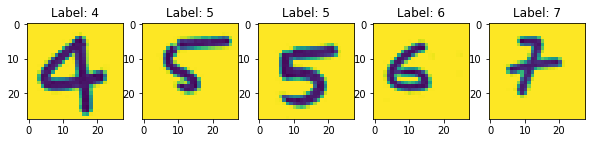

In [23]:


imgs = images[10:15]
lbls = labels[10:15]
print(imgs.shape, lbls.shape)
fig = plt.figure(figsize=(10, 3))
axes= fig.subplots(1, imgs.shape[0])
for i, img in enumerate(imgs):
    axes[i].imshow(img)
    axes[i].set_title("Label: %s"%lbls[i])


37 -24 -24 False
17 -26 -26 True
26 -27 26 True
15 -45 -45 False
19 -35 19 False


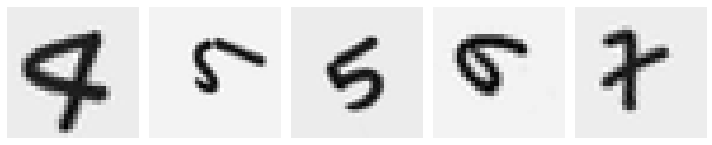

(28, 28)


In [67]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, imgs.shape[0])
m = lbls.shape[0]

# img_45 = ndimage.rotate(img1, angle, reshape=False, mode = "nearest")
for i in range(m):
    
    # randomly selecting angle between the range -45 to -15 and 15 to 45
    pos_angle = np.random.randint(low = 15, high = 45)
    neg_angle = np.random.randint(low = -45, high = -15)
    angle = np.random.choice([pos_angle,neg_angle])
    reshape_option = np.random.choice([True,False])
    print(pos_angle,neg_angle,angle, reshape_option)
    
    full_img_45 = ndimage.rotate(imgs[i], angle, reshape=reshape_option, mode = "nearest")
#     imgs = np.concatenate((imgs,full_img_45.reshape(1,28,28)), axis = 0)
    

    axes[i].imshow(full_img_45, cmap='gray')
    axes[i].set_axis_off()
    
fig.set_tight_layout(True)
plt.show()
print(full_img_45.shape)


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

result = ndimage.zoom(img, 9.0)
ax1.imshow(img)
ax2.imshow(result)
plt.show()

In [ ]:
from time import sleep

from itertools import cycle


for frame in cycle(r'-\|/-\|/'):
    print('\r', frame, sep=' ', end='', flush=True)
    sleep(0.2)

In [ ]:
x = np.array([[0,1,2,3,4],[5,6,7,8,9],[10,11,0,13,14],[15,0,17,0,19],[0,21,22,23,0]])
plt.imshow(x)


In [19]:
a = np.array([[[1, 2], [3, 4]]])
c = np.array([[[5, 2], [3, 7]]])


for i in range(3):    
    c= np.concatenate((c, a), axis=0)
    print(c.shape)    
print(c)


(2, 2, 2)
(3, 2, 2)
(4, 2, 2)
[[[5 2]
  [3 7]]

 [[1 2]
  [3 4]]

 [[1 2]
  [3 4]]

 [[1 2]
  [3 4]]]
